In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Cancer_data.csv")

In [3]:
df.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      564 non-null    float64
 1   mean_texture     562 non-null    float64
 2   mean_perimeter   563 non-null    float64
 3   mean_area        562 non-null    float64
 4   mean_smoothness  566 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   564.000000    562.000000      563.000000   562.000000   
mean     14.131346     19.305534       92.098934   655.263345   
std       3.538116      4.318572       24.347809   352.660038   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.687500     16.172500       75.190000   419.925000   
50%      13.355000     18.880000       86.240000   548.750000   
75%      15.892500     21.817500      104.500000   787.050000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       566.000000  569.000000  
mean          0.096296    0.627417  
std           0.014035    0.483918  
min           0.052630    0.000000  
25%           0.086130    0.000000  
50%           0.095825    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000

There are a total of 5 features of 569 entries. Every single feature has null values in it. One label column with the values of 0's and 1's. 1 saying Yes and 0 saying No. Every rest feature is continous in nature. mean_smoothness looks normalized with a max value of 0.163400

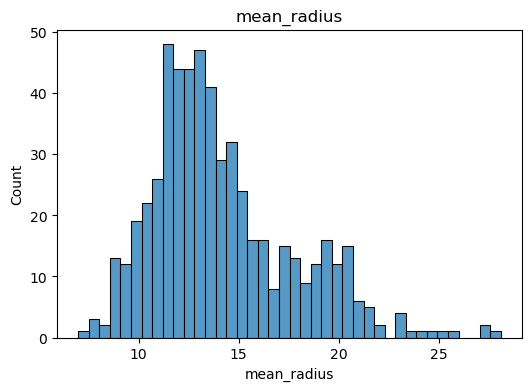

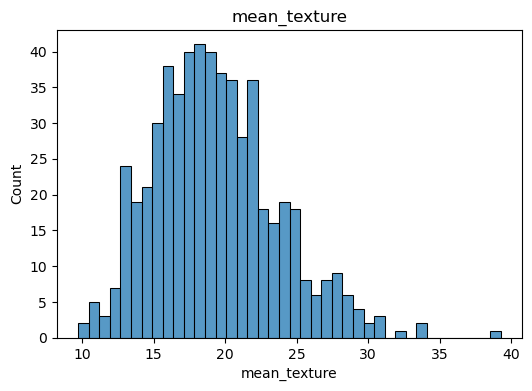

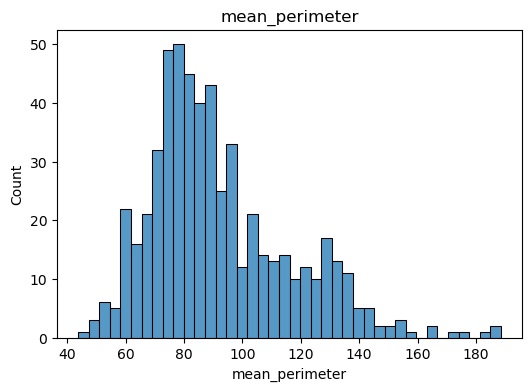

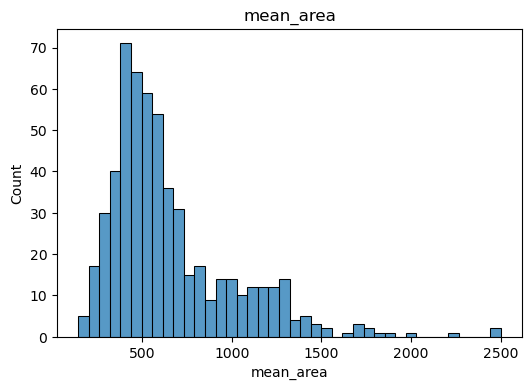

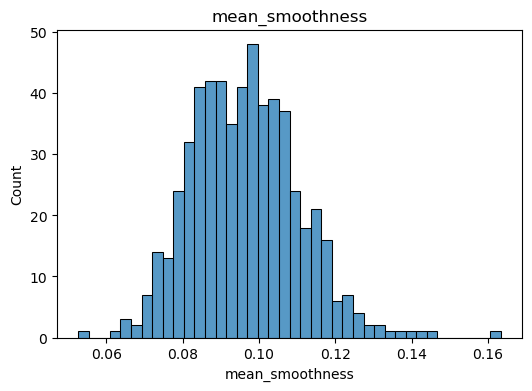

In [6]:
for column in df.columns:
    if df[column].dtype=='float64':
        plt.figure(figsize=(6,4))
        sns.histplot(df[column],bins=40)
        plt.title(column)
        plt.show()

All the features except mean_smoothness are left skewed and all of them might probably have outliers. All have single peak.

## Outlier Handling

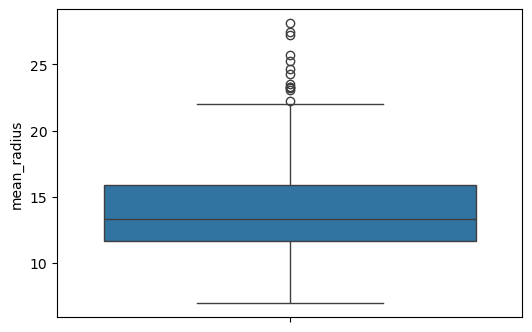

95%: 20.5785
5%: 9.51345


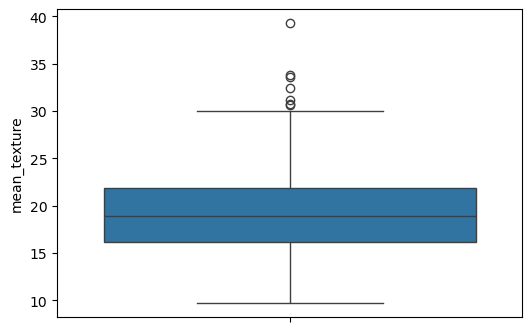

95%: 27.15
5%: 13.081


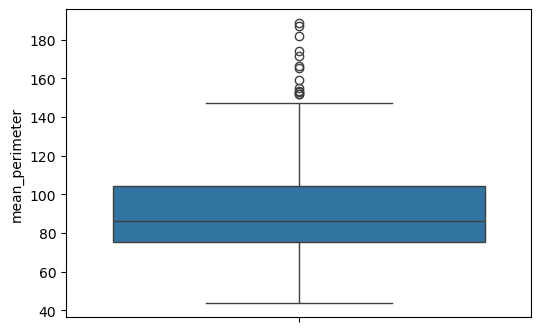

95%: 135.88
5%: 60.762


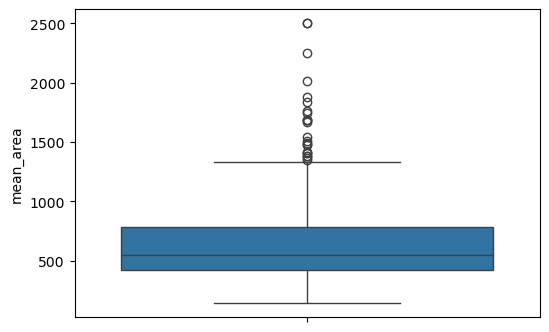

95%: 1310.85
5%: 278.65000000000003


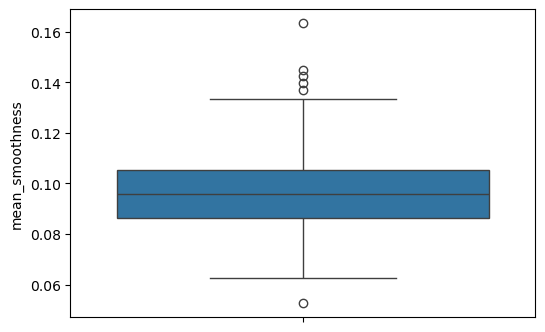

95%: 0.1186
5%: 0.075015


In [7]:
for column in df.columns:
    if df[column].dtype=='float64':
        plt.figure(figsize=(6,4))
        sns.boxplot(df[column])
        plt.show()
        print("95%:",df[column].quantile(0.95))
        print("5%:",df[column].quantile(0.05))

In [8]:
df['mean_radius']=np.where(df['mean_radius']>20.5785,20.5785,df['mean_radius'])
df['mean_texture']=np.where(df['mean_texture']>27.15,27.15,df['mean_texture'])
df['mean_perimeter']=np.where(df['mean_perimeter']>135.88,135.88,df['mean_perimeter'])
df['mean_area']=np.where(df['mean_area']>1310.85,1310.85,df['mean_area'])
df['mean_smoothness']=np.where(df['mean_smoothness']>0.1186,0.1186,df['mean_smoothness'])
df['mean_smoothness']=np.where(df['mean_smoothness']<0.075015,0.075015,df['mean_smoothness'])

### Handling missing values

In [9]:
df.isna().sum()

mean_radius        5
mean_texture       7
mean_perimeter     6
mean_area          7
mean_smoothness    3
diagnosis          0
dtype: int64

In [10]:
for column in df.columns:
    if df[column].dtype=='float64':
        df[column]=df[column].fillna(df[column].median())

### Standardization

In [11]:
 for column in df.columns:
     if df[column].dtype=='float64':
         df[column]=((df[column]-df[column].mean())/df[column].std())

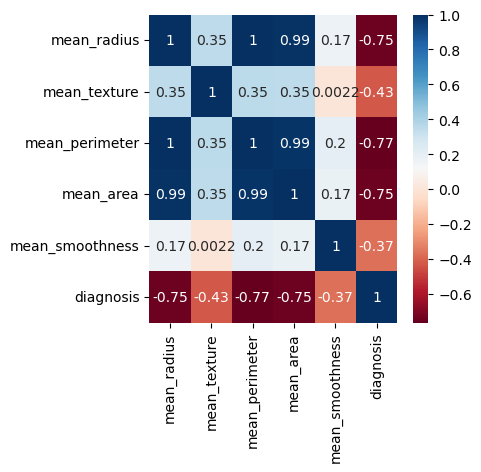

In [12]:
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="RdBu")
plt.show()

As we can see that mean_perimeter, mean_area and mean_radius are highly correlated, using all of them would probably cause multicollinearity. Hence, we would be using only mean_radius and dropping mean_perimeter and mean_area

In [13]:
df=df.drop(['mean_perimeter','mean_area'],axis=1)

### Logistic Regression Model

In [14]:
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred=logreg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
cnf_mx=confusion_matrix(y_test,y_pred)
cnf_mx

array([[41,  2],
       [ 2, 69]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**The model has 96% accuracy**

In [20]:
import pickle
model_pickle_file="Cancer_pkl"
with open(model_pickle_file,'wb') as file:
    pickle.dump(logreg,file)